<a href="https://colab.research.google.com/github/ydchen17/SeizureDetection/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# some imports are provided here for you
# you may add additional imports if needed
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import random as rand
import itertools as it

from pandas import DataFrame, Series

from scipy.cluster import hierarchy as hier
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
!curl -O https://raw.githubusercontent.com/ydchen17/datasets/main/uci-epileptic-seizure-recognition.csv
dataset = pd.read_csv('uci-epileptic-seizure-recognition.csv', index_col=0)
labels = dataset['y']
data = dataset.drop('y', axis = 1)
dataset.info()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 7445k  100 7445k    0     0  23.7M      0 --:--:-- --:--:-- --:--:-- 23.6M
<class 'pandas.core.frame.DataFrame'>
Index: 11500 entries, X21.V1.791 to X16.V1.210
Columns: 179 entries, x1 to y
dtypes: int64(179)
memory usage: 15.8+ MB


In [ ]:
dataset.isnull().sum()

x1      0
x2      0
x3      0
x4      0
x5      0
       ..
x175    0
x176    0
x177    0
x178    0
y       0
Length: 179, dtype: int64

In [ ]:

scaler = StandardScaler()
scaledData = scaler.fit_transform(data)

columnsNames = list(data.columns.values)
standardized_features = pd.DataFrame(scaledData, columns=columnsNames)

pca = PCA(n_components = 0.93)
pca.fit(standardized_features)
print(pca.explained_variance_ratio_.cumsum())
print("Number of features kept: " + str(pca.n_components_))

pcaData = pd.DataFrame(pca.transform(standardized_features))
print("Dimensionality of resulting dataset: " + str(pcaData.shape))
pcaData.head(10)

[0.05608402 0.10848017 0.15812649 0.20638611 0.25043853 0.29190671
 0.33245331 0.37142962 0.40806411 0.44212569 0.47516669 0.50800111
 0.53756821 0.56688859 0.59248149 0.61604367 0.63740125 0.65817125
 0.67830967 0.69795784 0.71718456 0.73534039 0.75309867 0.77033898
 0.78661049 0.80284858 0.81802755 0.83275236 0.84715873 0.86102108
 0.87460198 0.88764203 0.9001851  0.91161128 0.92253548 0.93213354]
Number of features kept: 36
Dimensionality of resulting dataset: (11500, 36)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,-0.137475,-1.146419,0.836893,-0.071085,-0.177048,-0.825731,0.777044,0.337638,2.744494,-0.734679,-1.858364,-0.575098,-2.283809,-1.480130,0.536623,1.797758,-1.304498,-0.826774,-1.069111,0.131263,-0.254075,0.523774,3.188935,-1.621503,-1.255830,-1.783678,0.989458,-0.329549,0.782859,0.994987,-2.154933,1.053161,-0.090869,0.254414,-0.225816,-1.055100
1,-1.703794,-3.643195,6.153822,8.033432,4.549536,5.892971,3.758370,-5.804916,4.187441,11.192247,16.952491,20.259868,-1.119602,-3.165269,-0.255132,-0.346821,0.653578,-8.063784,2.232220,2.624154,3.521397,3.359981,-3.012427,-3.257723,-3.054220,5.884766,-6.613854,-3.787651,0.363758,-5.864539,-7.613729,5.082526,-2.786232,1.832683,2.158849,2.594621
2,0.495650,-0.261660,0.931210,-0.663789,1.587618,-1.604942,-0.880830,-1.591959,-0.400873,-1.435073,0.930674,0.258192,0.861424,-0.719047,-0.134005,-1.141796,0.123709,-0.761241,-0.107249,0.213831,-0.092839,-0.712027,0.372510,0.520836,0.463249,0.416318,0.295579,-0.491501,-0.006504,0.124686,0.027333,0.946955,0.827331,-0.611872,0.389295,-0.490630
3,-0.174219,0.249557,-0.073646,-0.108047,1.615415,-3.136337,-0.559638,-3.032901,-0.222729,-1.465921,-0.155415,0.029865,0.769987,-0.046199,-0.315557,0.320279,-0.140277,0.235737,0.266334,0.063907,-0.364439,0.524405,0.210725,0.004142,-0.034573,0.027732,-0.235839,0.252354,0.179257,-0.322617,0.162047,-0.002372,-0.053858,-0.205829,-0.160254,0.048781
4,-0.239163,0.117304,0.486502,-0.530629,0.187739,-0.371186,-0.045861,0.481596,-0.094907,0.541482,-0.353334,-0.034673,0.607452,0.920716,-1.179762,-0.129448,-0.187113,-0.596797,0.131648,0.390265,0.873515,0.232010,-0.086762,0.217918,0.424960,-0.166630,0.617241,0.208009,-0.383451,-0.360548,-0.399276,0.100645,-0.334393,0.155918,-0.114335,0.262911
5,0.341840,0.083319,-0.404271,0.684176,-0.733687,1.507446,0.680056,0.848290,0.247059,-0.246276,0.828068,-0.174298,-0.479234,1.298629,1.921149,1.135746,0.039082,-0.878813,0.712431,0.392496,-0.916428,-0.498812,-0.101987,-1.007989,-0.321412,-0.106494,-0.301265,-0.598249,-0.017444,-0.123540,-0.333288,0.765853,0.445032,0.552340,-0.035500,0.032115
6,0.430794,0.172050,0.138366,-0.539700,0.098236,0.841051,0.260163,1.469505,0.694535,0.005560,0.772659,0.610999,-0.998424,1.215498,0.321575,-0.937734,-1.952135,-0.972743,-1.774730,1.665403,0.772107,-0.347661,0.012735,0.314134,-0.062858,-1.629448,-1.284271,-0.696808,-0.491114,0.181529,1.090898,-1.093767,-0.915146,-0.627678,-0.476141,-0.253018
7,-0.241768,0.194411,-0.592769,-0.499100,0.284564,-1.777381,0.555976,-1.443498,1.097548,0.960977,-1.304347,-0.615840,-0.272201,0.208766,1.092836,0.369691,-0.296677,-0.023555,0.461934,0.383827,-0.206246,-0.128255,0.114304,-0.022759,-0.150577,-0.202020,-0.008947,0.027967,-0.090413,0.051767,0.022412,0.243084,-0.222817,-0.000785,-0.005456,0.206362
8,2.693092,-2.715778,0.883136,4.299721,1.958305,-2.150193,-4.819647,0.450756,0.440971,-0.774489,0.731826,-0.002576,5.256630,3.666150,-2.127898,-0.191465,-1.882606,3.469996,-1.341539,-1.044263,0.717035,1.525137,-0.060418,-0.675242,1.028670,-2.432424,-1.602506,0.240870,0.612104,-0.526299,1.272543,-0.739935,-0.956253,1.020405,-0.863924,-0.463710
9,-0.058517,-0.174253,-0.126161,-0.004984,-0.451385,0.858773,0.486604,0.666725,0.120098,-0.860483,-0.122544,-0.498145,0.398579,0.144931,-0.308998,0.019175,-0.181558,-1.127491,-0.004928,-0.090371,0.335771,-0.736992,-0.053927,0.388918,-0.283263,-0.382859,0.066404,0.283561,-0.332619,0.040987,0.064881,0.171789,0.140052,0.022782,0.541749,0.095203


In [ ]:
# do not change this plotting function!
def scatter(data, labels, numPoints = 300):
    
    numEntries = data.shape[0]
    start = rand.randint(0, numEntries - numPoints)
    end = start + numPoints
    data = data.iloc[start:end, :]
    labels = labels.iloc[start:end]
    
    mds = MDS(n_components=2)
    mds_data = mds.fit_transform(data.iloc[:, :-1])

    fig, ax = plt.subplots()
    scatter = ax.scatter(mds_data[:, 0], mds_data[:, 1], c=labels, s=50)
    legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Type")
    plt.show()

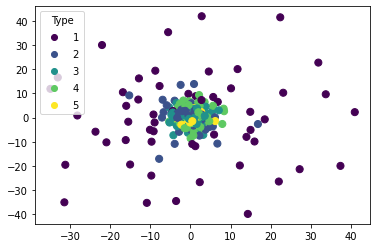

In [ ]:
scatter(pcaData, labels, 300)

In [ ]:
dataset = pd.read_csv('uci-epileptic-seizure-recognition.csv', index_col=0)
dataset = dataset[dataset["y"]!=1]
labels = dataset['y']
data = dataset.drop('y', axis = 1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9200 entries, X21.V1.791 to X16.V1.210
Columns: 179 entries, x1 to y
dtypes: int64(179)
memory usage: 12.6+ MB


In [ ]:
scaler = StandardScaler()
scaledData = scaler.fit_transform(data)

columnsNames = list(data.columns.values)
standardized_features = pd.DataFrame(scaledData, columns=columnsNames)

pca = PCA(n_components = 0.93)
pca.fit(standardized_features)
print(pca.explained_variance_ratio_.cumsum())
print("Number of features kept: " + str(pca.n_components_))

pcaData = pd.DataFrame(pca.transform(standardized_features))
print("Dimensionality of resulting dataset: " + str(pcaData.shape))
pcaData.head(10)

[0.20443723 0.306556   0.39691951 0.46598167 0.51388873 0.55401313
 0.58992954 0.62060228 0.65043817 0.67789243 0.7012504  0.72122473
 0.73931919 0.75701238 0.77425622 0.79057655 0.80571962 0.82017478
 0.83408706 0.84696784 0.85951101 0.8717171  0.88362336 0.89502167
 0.90553086 0.91489779 0.92289404 0.92969255 0.93641194]
Number of features kept: 29
Dimensionality of resulting dataset: (9200, 29)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,2.164464,2.089713,2.888533,5.091977,4.992605,-2.029501,6.113646,4.369046,-1.193855,-2.957234,-2.436551,-1.855967,-0.988686,-0.192701,-0.161197,0.566936,-0.719519,3.351842,0.801403,1.230110,-0.838813,-2.768152,-0.668813,0.640273,1.034066,0.640521,10.015883,-0.019577,-5.506514
1,6.828613,0.165357,1.281408,-4.205062,-0.697134,1.297488,-0.283829,-0.672604,-0.096510,0.170257,-0.360479,-0.695760,-1.656997,-1.980391,-2.032669,-2.741408,-0.450139,-1.667435,-1.667333,-0.585822,0.725029,0.116098,2.627936,-0.361251,-1.677912,-0.448886,0.477925,-1.895507,-0.338451
2,11.581817,-1.134472,-0.927397,-1.253396,0.373895,-0.460184,-1.108076,0.047851,-0.563472,0.230972,1.106882,0.906891,-0.241549,0.790286,0.206175,0.185137,-0.022658,0.081277,-0.025883,0.228619,-0.132281,0.607459,0.196048,0.598404,0.798412,0.049380,-0.556643,-0.027767,-0.330820
3,-0.397144,1.555095,-3.723981,-0.413207,0.506573,-0.285428,-1.204795,-1.269560,0.994109,-0.227190,0.864354,-0.296213,0.511778,0.438028,0.169377,-1.788897,-0.032556,0.622712,0.570713,-0.500971,0.754705,-2.188071,1.663642,-1.054327,0.121831,-0.225688,0.554749,0.775506,-0.192318
4,-5.081259,-5.472188,2.371763,0.874998,1.381527,-1.809043,0.271132,-0.451698,-0.230943,-4.980397,-1.891656,0.487247,-0.735319,-0.367500,0.088200,0.985305,0.570614,0.146997,0.489700,0.076520,0.254132,0.970410,0.539353,1.390959,-0.055788,-0.055547,0.866880,-0.427059,0.115940
5,-4.573745,-1.083319,-1.114914,-0.898294,1.354382,-1.783992,0.799185,-0.953325,1.583168,1.976872,-1.935842,1.360384,5.153328,-2.357958,-5.502754,-3.783177,-0.047954,0.923951,-2.279401,1.487901,-1.311554,-1.938809,0.617748,-0.390864,4.618043,0.689635,2.158922,-0.867915,1.582722
6,4.384036,-1.183235,-0.537284,5.126471,3.415135,0.481789,-1.450997,0.124884,0.560283,-0.707293,-1.693646,-0.921532,1.277574,0.329788,0.571371,0.006195,-1.016949,-0.432363,1.597203,0.219891,-0.285715,0.215230,-0.522322,0.667741,0.659208,-0.129973,0.200121,0.117274,0.033661
7,-2.268882,0.804315,0.363316,-0.848706,-0.562005,-0.416127,2.033125,-1.084002,0.168549,-1.741926,-0.361542,0.283633,0.218970,-0.841620,-0.187318,-1.711664,-0.272289,0.403466,1.725030,-0.339743,0.887878,0.446338,1.739495,-0.160075,1.701364,0.392244,-0.752006,0.323588,-0.905263
8,3.073741,0.622117,0.631151,0.698453,-0.551895,-1.088601,-0.395609,0.302543,-0.612422,1.904900,-0.256259,0.759489,-1.822714,-0.266021,0.170344,-0.038944,-0.563022,1.613606,0.573595,1.050090,-0.135052,-2.640961,0.511648,-0.034829,-0.336514,0.918581,-1.156604,2.287553,-0.488835
9,11.289401,2.092531,-7.970460,-2.263243,-6.185761,-5.442091,6.528700,0.761920,1.692974,0.868524,1.731856,0.698964,2.672567,-2.111981,2.465313,0.667742,-0.088327,-1.996688,0.367702,-0.898138,0.708954,1.628488,-0.916270,-3.571897,2.042198,-0.809833,0.745228,-0.267149,-0.254733


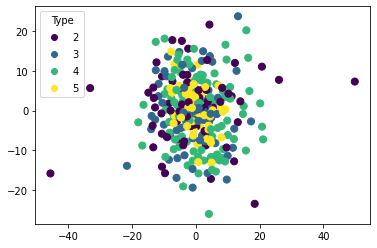

In [ ]:
scatter(pcaData, labels, 300)

In [ ]:
mds = MDS(n_components=2)

In [ ]:
labels

column_a
X21.V1.791    4
X8.V1.1       5
X16.V1.60     5
X20.V1.54     5
X14.V1.56     5
             ..
X21.V1.762    3
X22.V1.114    2
X8.V1.28      5
X10.V1.932    3
X16.V1.210    4
Name: y, Length: 9200, dtype: int64

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 7445k  100 7445k    0     0  54.6M      0 --:--:-- --:--:-- --:--:-- 54.2M
<class 'pandas.core.frame.DataFrame'>
Index: 11500 entries, X21.V1.791 to X16.V1.210
Columns: 179 entries, x1 to y
dtypes: int64(179)
memory usage: 15.8+ MB


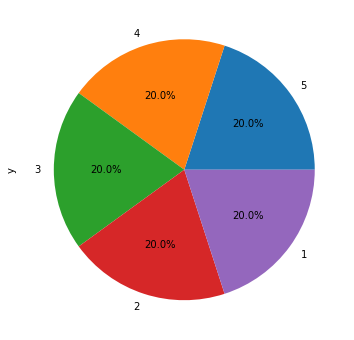

In [ ]:
!curl -O https://raw.githubusercontent.com/ydchen17/datasets/main/uci-epileptic-seizure-recognition.csv
df = pd.read_csv('uci-epileptic-seizure-recognition.csv', index_col=0)
df.info()
plt.figure(figsize = (10,6))
plt.axes(aspect='equal')
df['y'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.show()

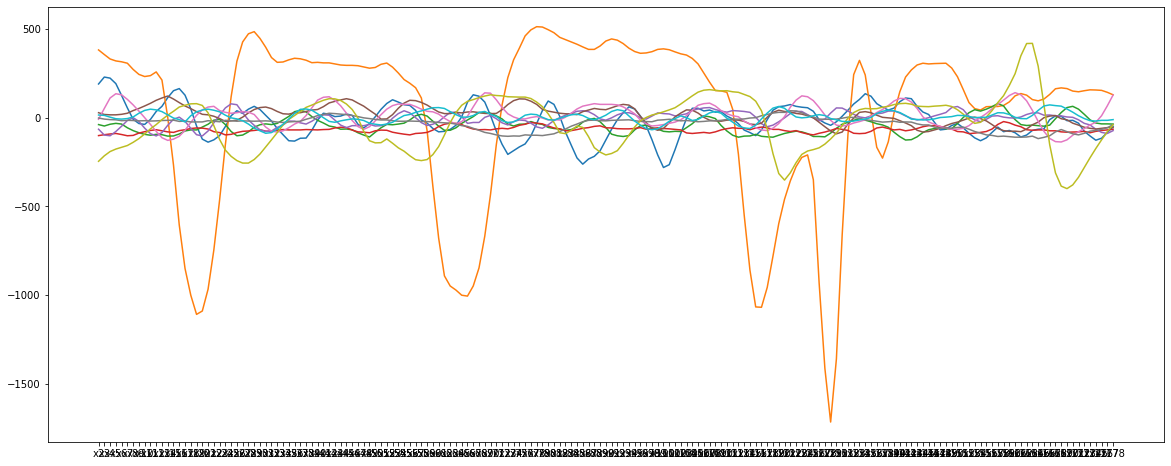

In [ ]:
plt.figure(figsize=(20, 8))
[plt.plot(df.iloc[i][1:-1]) for i in range(10)];
# The semicolon above suppresses matplotlib.lines output

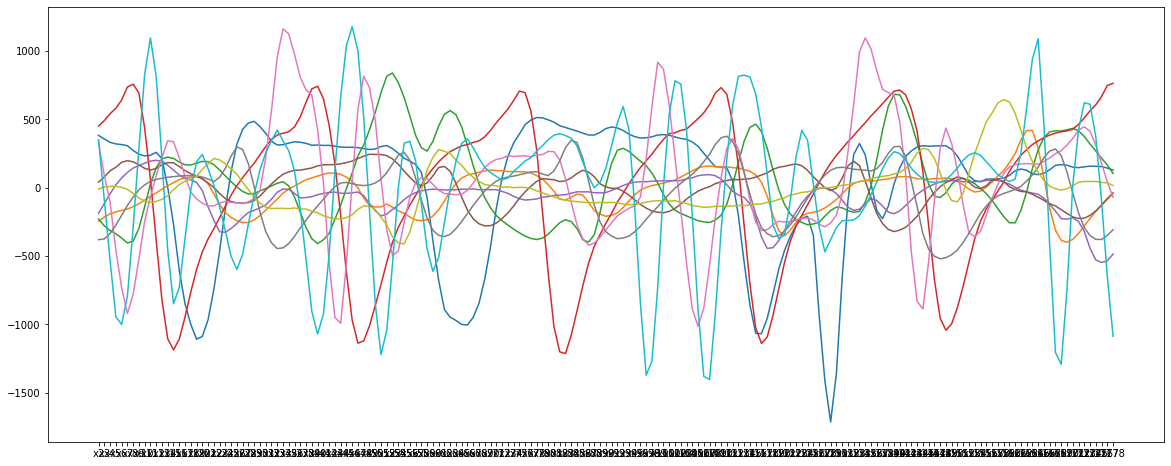

In [ ]:
plt.figure(figsize=(20, 8))
[plt.plot(df[df["y"]==1].iloc[i][1:-1]) for i in range(10)];
# The semicolon above suppresses matplotlib.lines output

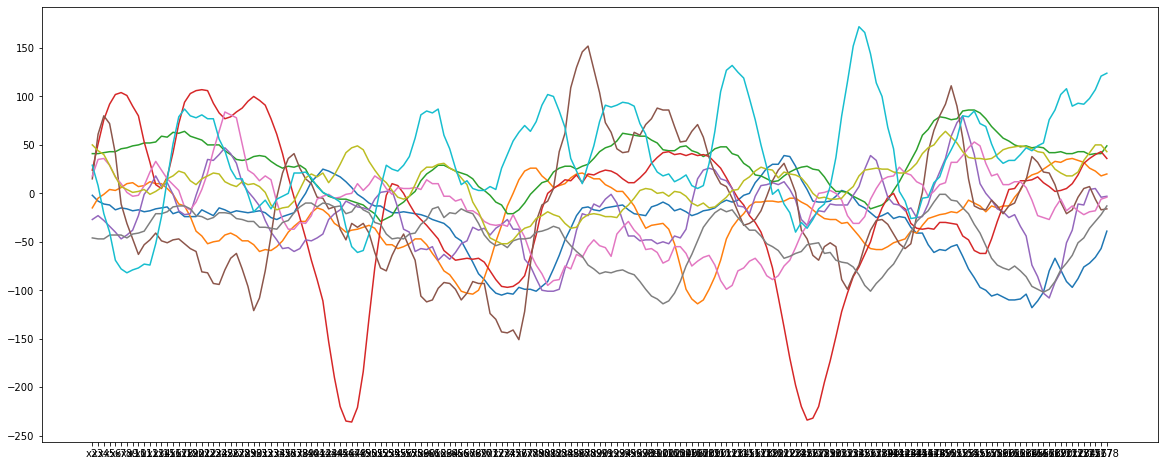

In [ ]:
plt.figure(figsize=(20, 8))
[plt.plot(df[df["y"]==2].iloc[i][1:-1]) for i in range(10)];
# The semicolon above suppresses matplotlib.lines output

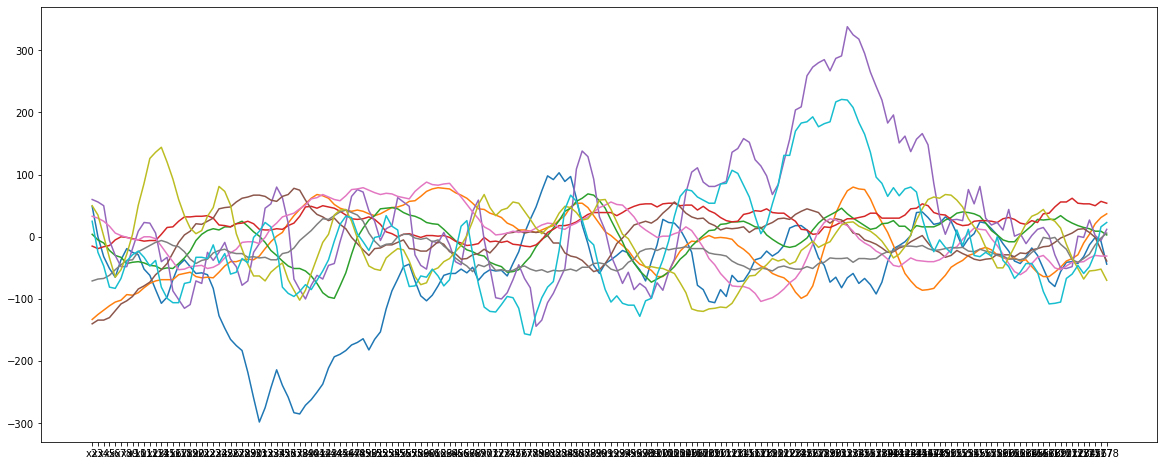

In [ ]:
plt.figure(figsize=(20, 8))
[plt.plot(df[df["y"]==3].iloc[i][1:-1]) for i in range(10)];
# The semicolon above suppresses matplotlib.lines output

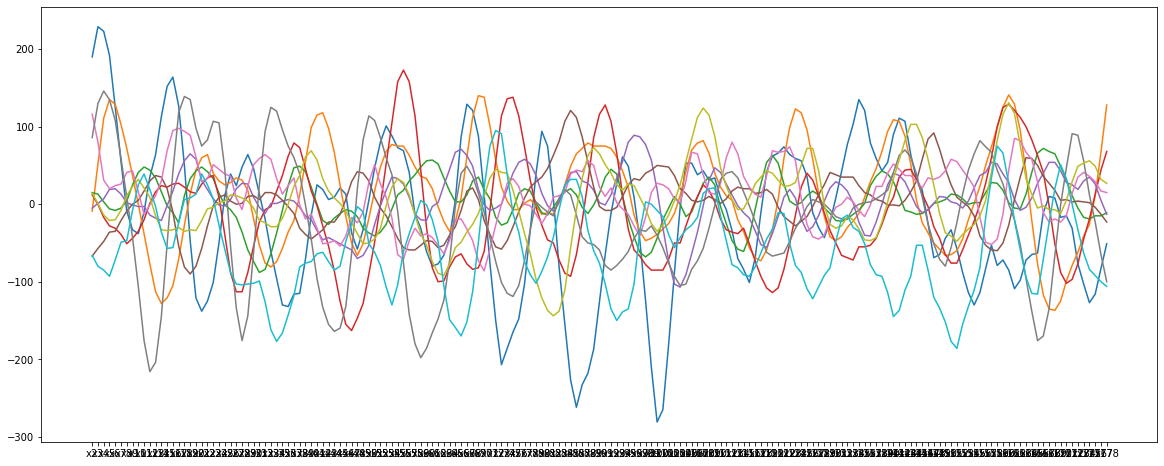

In [ ]:
plt.figure(figsize=(20, 8))
[plt.plot(df[df["y"]==4].iloc[i][1:-1]) for i in range(10)];
# The semicolon above suppresses matplotlib.lines output

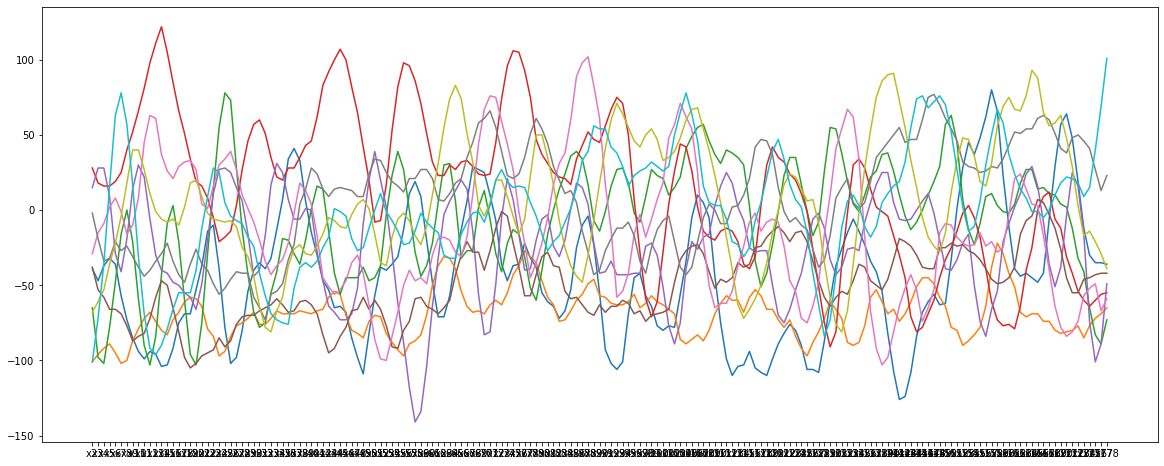

In [ ]:
plt.figure(figsize=(20, 8))
[plt.plot(df[df["y"]==5].iloc[i][1:-1]) for i in range(10)];
# The semicolon above suppresses matplotlib.lines output

In [ ]:
df[df["y"]==5].describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,...,x140,x141,x142,x143,x144,x145,x146,x147,x148,x149,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,y
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,...,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.00000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.0
mean,-6.326957,-5.673043,-5.380870,-5.097391,-5.309130,-5.618261,-5.950000,-6.218696,-6.378696,-6.871304,-7.143478,-7.155652,-6.816087,-6.341739,-6.131739,-5.875217,-5.462609,-5.298696,-5.232174,-5.266957,-5.430870,-5.716957,-6.091739,-6.794348,-6.876957,-6.740870,-6.329565,-5.850000,-5.597826,-5.831304,-6.369565,-6.680000,-7.151304,-6.943043,-6.631739,-6.027826,-5.740000,-5.954783,-6.259565,-6.590000,...,-6.438261,-6.810000,-7.145652,-7.322174,-7.263043,-7.175217,-6.853478,-6.486522,-6.433478,-6.556522,-6.101304,-5.512609,-4.962174,-4.830000,-5.249130,-5.862609,-6.237391,-6.222609,-6.223043,-5.975652,-5.962609,-5.940000,-6.170435,-6.64913,-7.215217,-7.076957,-6.505217,-5.743913,-5.223913,-5.229565,-5.562174,-5.941304,-6.072609,-6.377391,-6.573043,-6.760870,-7.083478,-7.183913,-6.964348,5.0
std,47.553062,47.903503,48.135729,48.560703,48.568777,48.906275,49.121173,49.197125,48.996716,48.979947,48.896028,48.472834,48.189072,47.858977,47.544458,47.002231,46.811022,47.345866,48.504203,49.227296,48.974947,48.319190,48.670822,48.300845,47.924764,47.520887,47.416905,47.736933,47.461342,47.099510,47.066997,47.976716,48.889883,49.456408,49.320926,48.602068,48.504662,48.372941,47.785897,47.272315,...,47.144656,47.046875,47.250741,48.005782,48.282993,48.189782,47.858569,48.043154,47.935285,47.922556,47.965332,48.107384,47.427249,47.284083,46.624159,46.539579,46.880960,47.343938,47.122353,47.221018,47.695856,47.871228,47.850496,47.52551,47.348579,47.502750,47.654572,48.023610,47.893303,47.512691,47.424105,47.793875,47.799416,47.660365,47.505155,47.687482,47.977213,48.238124,48.276043,0.0
min,-177.000000,-179.000000,-155.000000,-153.000000,-191.000000,-206.000000,-202.000000,-196.000000,-167.000000,-165.000000,-174.000000,-206.000000,-219.000000,-205.000000,-185.000000,-192.000000,-235.000000,-254.000000,-246.000000,-207.000000,-169.000000,-160.000000,-175.000000,-169.000000,-184.000000,-187.000000,-187.000000,-175.000000,-173.000000,-167.000000,-160.000000,-176.000000,-215.000000,-209.000000,-205.000000,-183.000000,-157.000000,-168.000000,-194.000000,-195.000000,...,-172.000000,-172.000000,-164.000000,-170.000000,-181.000000,-165.000000,-158.000000,-183.000000,-174.000000,-165.000000,-174.000000,-196.000000,-209.000000,-215.000000,-224.000000,-222.000000,-199.000000,-195.000000,-201.000000,-172.000000,-201.000000,-214.000000,-220.000000,-206.00000,-199.000000,-205.000000,-177.000000,-172.000000,-188.000000,-204.000000,-180.000000,-167.000000,-167.000000,-163.000000,-167.000000,-182.000000,-196.000000,-187.000000,-180.000000,5.0
25%,-37.000000,-37.000000,-37.000000,-38.000000,-38.000000,-37.000000,-38.000000,-39.000000,-38.000000,-37.000000,-38.250

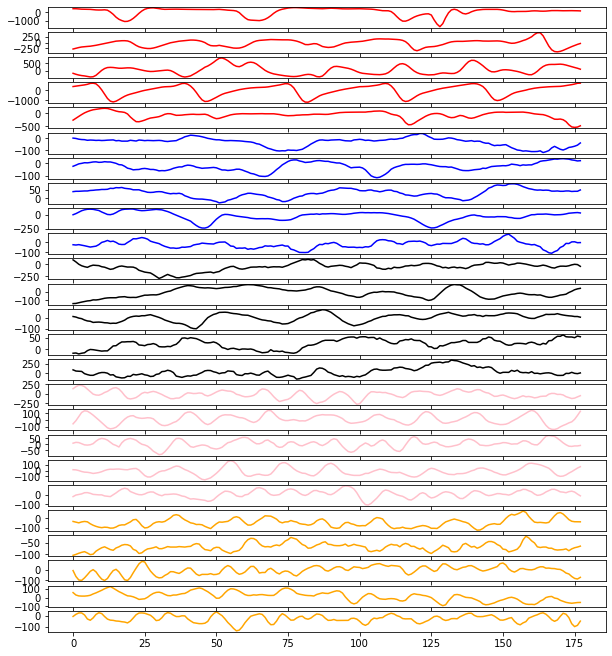

In [ ]:
m,n = df.shape
fig, ax = plt.subplots(5*5,1, figsize = (10,2.3*5))
colors = ['yellow', 'red', 'blue', 'black', 'pink', 'orange']
label_names = [' Recording of seizure activity',
              'the area where the tumor was located',
              'the EEG activity from the healthy brain area',
              'eyes closed','eyes open']
k = 0 
for label in range(1,6):
    mask = df['y'] == label
    temp_df = df[mask].head()
    values = temp_df.values[:,:-1]
    for i, lineArr in enumerate(values):
        ax[k].plot(lineArr, color = colors[label], label = label_names[label - 1])
        k += 1
plt.show()

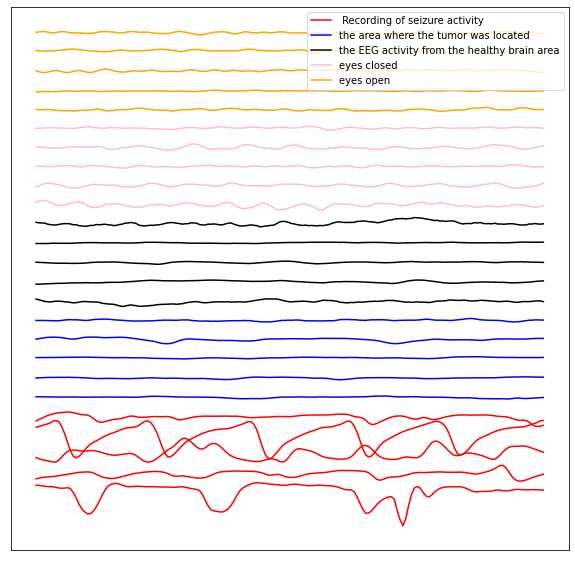

In [ ]:
plt.figure(figsize = (10, 2*5))
colors = ['yellow', 'red', 'blue', 'black', 'pink', 'orange']
k = 0 
for label in range(1,6):
    mask = df['y'] == label
    temp_df = df[mask].head()
    values = temp_df.values[:,:-1]
    for i, lineArr in enumerate(values):
        if i == 0 :
            plt.plot(lineArr + k * 1000, color = colors[label], 
                     label = label_names[label - 1])
        else:
            plt.plot(lineArr + k * 1000, color = colors[label])
        k += 1 
plt.legend(loc = 'upper right')
plt.xticks([])
plt.yticks([])
plt.show()